 ### Breast cancer data (feature 30개)
- 차원 축소 (2,5,10) 정도로 비교 -> 설명력
- PCA 전후 분류 (Logistic Regression) 비교

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [40]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target']= cancer.target
df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0


- cancer 데이터 정규화
- 정규화의 목표: 데이터의 중복을 막아서 무결성 유지 및 DB 저장 용량 줄이기

In [41]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)
cancer_std[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

- PCA로 차원 축소

In [42]:
# 원본 (30차원 .. feature 30개니까)
from sklearn.decomposition import PCA
pca30 = PCA(n_components=30)
cancer_pca30 = pca30.fit_transform(cancer_std)
pca30.explained_variance_ratio_, sum(pca30.explained_variance_ratio_)

(array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
        5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
        1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
        8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
        1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
        9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
        5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
        2.49601032e-05, 4.43482743e-06]),
 1.0)

In [43]:
# 2차원 / 설명력
pca2 = PCA(n_components=2)
cancer_pca2 = pca2.fit_transform(cancer_std)
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)

(array([0.44272026, 0.18971182]), 0.6324320765155951)

In [44]:
# 5차원 / 설명력
pca5 = PCA(n_components=5)
cancer_pca5 = pca5.fit_transform(cancer_std)
pca5.explained_variance_ratio_, sum(pca5.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 0.847342743167966)

In [45]:
# 10차원 / 설명력
pca10 = PCA(n_components=10)
cancer_pca10 = pca10.fit_transform(cancer_std)
pca10.explained_variance_ratio_, sum(pca10.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.951568814330965)

In [46]:
# 20차원 / 설명력
pca20 = PCA(n_components=20)
cancer_pca20 = pca20.fit_transform(cancer_std)
pca20.explained_variance_ratio_, sum(pca20.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
        0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783,
        0.00266209, 0.00197997, 0.00175396, 0.00164925, 0.00103865]),
 0.9955720432628138)

### PCA (차원 축소) 전후 비교

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [57]:
# 원본 :: 정규화된 애로 해야 됨 (cancer_std)... 정규화 안하면 max iter?로 키워줘야 함.
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2021
)
lr = LogisticRegression(random_state=2021)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.993006993006993

In [49]:
# 2차원 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2, cancer.target, stratify=cancer.target, random_state=2021
)
lr2 = LogisticRegression(random_state=2021)
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.9440559440559441

In [50]:
# 5차원 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5, cancer.target, stratify=cancer.target, random_state=2021
)
lr5 = LogisticRegression(random_state=2021)
lr5.fit(X_train, y_train)
lr5.score(X_test, y_test)

0.993006993006993

In [51]:
# 10차원 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10, cancer.target, stratify=cancer.target, random_state=2021
)
lr = LogisticRegression(random_state=2021)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.986013986013986

In [52]:
# 20차원 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca20, cancer.target, stratify=cancer.target, random_state=2021
)
lr = LogisticRegression(random_state=2021)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.993006993006993

In [53]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify = y, random_state=2021
    )
    lr = LogisticRegression(random_state=2021)
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    return score

In [60]:
for n in [2,5,10,20,0]:
    if n == 0:
        acc = pca_accuracy(cancer_std, cancer.target)
        print(f'원 데이터 - 정확도: {acc:.4f}')
    else:
          pca = PCA(n_components=n)
          cancer_pca = pca.fit_transform(cancer_std)
          acc = pca_accuracy(cancer_pca, cancer.target)
          explained = sum(pca.explained_variance_ratio_)
          print(f'PCA {n}차원 - 정확도 : {acc:4f} /  설명력 :{explained:4f}')

PCA 2차원 - 정확도 : 0.944056 /  설명력 :0.632432
PCA 5차원 - 정확도 : 0.993007 /  설명력 :0.847343
PCA 10차원 - 정확도 : 0.986014 /  설명력 :0.951569
PCA 20차원 - 정확도 : 0.993007 /  설명력 :0.995572
원 데이터 - 정확도: 0.9930


In [59]:
for n in [2,5,10,0]:
    if n == 0:
        acc = pca_accuracy(cancer_std, cancer.target)
        print(f'원 데이터 - 정확도: {acc:.4f}')
    else:
        pca = PCA(n_components=n)
        cancer_pca = pca.fit_transform(cancer_std)
        explained = sum(pca.explained_variance_ratio_)
        acc = pca_accuracy(cancer_pca, cancer.target)
        print(f'PCA {n} - 정확도 {acc:.4f}, 설명력: {explained:.4f}')

PCA 2 - 정확도 0.9441, 설명력: 0.6324
PCA 5 - 정확도 0.9930, 설명력: 0.8473
PCA 10 - 정확도 0.9860, 설명력: 0.9516
원 데이터 - 정확도: 0.9930


In [ ]:
pca = PCA(n_components=2)
cancer.pca = pca.fit_transform(cancer_std)
df['PC1'] = cancer_pca[:,0]
df['PC2'] = cancer_pca[:,1]

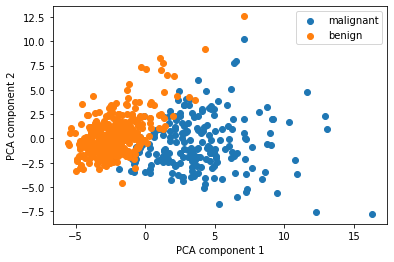

In [ ]:
markers = ['s','o']
for i in range(2):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, label =cancer.target_names[i])


plt.legend()
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.show()